In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./diabetic_data.csv")

In [3]:
data

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [4]:
data = data.replace('?', np.nan)

# Imputacje

In [5]:
data.isna().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

weight bo dużo brakujacych,
payer_code bo i dużo i wydaje się być bez znaczenia,
medical_specialty bo dużo i ciężko uzupełnić

In [6]:
data = data.drop(columns=['weight', 'payer_code', 'medical_specialty'])

diag1,2,3 oraz race można usunąć po prostu wiersze, bo jest ich mało a znowu ciężko uzupełnić

In [7]:
data = data.dropna()

In [8]:
data.gender.value_counts()

Female             52833
Male               45219
Unknown/Invalid        1
Name: gender, dtype: int64

można więc się pozbyc tego jednego przypadku

In [9]:
data = data[~data['gender'].isin(["Unknown/Invalid"])]

usuńmy teraz te kolumny, w których jakaś wartość odpowiada za chociaż 80% wszystkich odpowiedzi

In [10]:
for (columnName, columnData) in data.iteritems():
    if columnData.value_counts(normalize=True).tolist()[0] >= 0.80:
        data = data.drop(columns=[columnName])

In [11]:
data.columns.values

array(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'insulin', 'change',
       'diabetesMed', 'readmitted'], dtype=object)

'encounter_id', 'patient_nbr' można usunąć, bo 1. mogą to być dane identyfikujące osobę, czego wolimy uniknąć, 2. niepotrzebne

In [12]:
data = data.drop(columns=['encounter_id', 'patient_nbr'])

# Encoding

czas na encodingi kategorycznych

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98052 entries, 1 to 101765
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      98052 non-null  object
 1   gender                    98052 non-null  object
 2   age                       98052 non-null  object
 3   admission_type_id         98052 non-null  int64 
 4   discharge_disposition_id  98052 non-null  int64 
 5   admission_source_id       98052 non-null  int64 
 6   time_in_hospital          98052 non-null  int64 
 7   num_lab_procedures        98052 non-null  int64 
 8   num_procedures            98052 non-null  int64 
 9   num_medications           98052 non-null  int64 
 10  number_inpatient          98052 non-null  int64 
 11  diag_1                    98052 non-null  object
 12  diag_2                    98052 non-null  object
 13  diag_3                    98052 non-null  object
 14  number_diagnoses     

## sposob 1 - one hot

In [14]:
temp = data.select_dtypes(include=['object']).columns.tolist()

In [15]:
temp

['race',
 'gender',
 'age',
 'diag_1',
 'diag_2',
 'diag_3',
 'insulin',
 'change',
 'diabetesMed',
 'readmitted']

In [16]:
pd.get_dummies(data, columns=temp).head()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_inpatient,number_diagnoses,race_AfricanAmerican,...,insulin_No,insulin_Steady,insulin_Up,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,readmitted_<30,readmitted_>30,readmitted_NO
1,1,1,7,3,59,0,18,0,9,0,...,0,0,1,1,0,0,1,0,1,0
2,1,1,7,2,11,5,13,1,6,1,...,1,0,0,0,1,0,1,0,0,1
3,1,1,7,2,44,1,16,0,7,0,...,0,0,1,1,0,0,1,0,0,1
4,1,1,7,1,51,0,8,0,5,0,...,0,1,0,1,0,0,1,0,0,1
5,2,1,2,3,31,6,16,0,9,0,...,0,1,0,0,1,0,1,0,1,0


daje troche dużo kolumn, w zależności od sprzętu może to byC złe albo bez różnicy

## sposob 2 - label

In [17]:
temp = data.select_dtypes(include=['object'])

In [18]:
temp = temp.astype('category')

In [19]:
for col in temp.columns:
    data[col] = temp[col].cat.codes

In [20]:
data

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,insulin,change,diabetesMed,readmitted
1,2,0,1,1,1,7,3,59,0,18,0,143,77,121,9,3,0,1,1
2,0,0,2,1,1,7,2,11,5,13,1,454,76,763,6,1,1,1,2
3,2,1,3,1,1,7,2,44,1,16,0,553,95,248,7,3,0,1,2
4,2,1,4,1,1,7,1,51,0,8,0,54,23,86,5,2,0,1,2
5,2,1,5,2,1,2,3,31,6,16,0,263,244,86,9,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,0,1,7,1,3,7,3,51,0,16,0,102,146,295,9,0,0,1,1
101762,0,0,8,1,4,5,5,33,3,18,1,381,131,535,9,2,1,1,2
101763,2,1,7,1,1,7,1,53,0,9,0,236,387,159,13,0,0,1,2
101764,2,0,8,2,3,7,10,45,2,21,1,691,140,667,9,3,0,1,2


niestety, ale chyba musimy użyć label encodingu...

# Analiza eksploracyjna

In [21]:
data

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,insulin,change,diabetesMed,readmitted
1,2,0,1,1,1,7,3,59,0,18,0,143,77,121,9,3,0,1,1
2,0,0,2,1,1,7,2,11,5,13,1,454,76,763,6,1,1,1,2
3,2,1,3,1,1,7,2,44,1,16,0,553,95,248,7,3,0,1,2
4,2,1,4,1,1,7,1,51,0,8,0,54,23,86,5,2,0,1,2
5,2,1,5,2,1,2,3,31,6,16,0,263,244,86,9,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,0,1,7,1,3,7,3,51,0,16,0,102,146,295,9,0,0,1,1
101762,0,0,8,1,4,5,5,33,3,18,1,381,131,535,9,2,1,1,2
101763,2,1,7,1,1,7,1,53,0,9,0,236,387,159,13,0,0,1,2
101764,2,0,8,2,3,7,10,45,2,21,1,691,140,667,9,3,0,1,2


<AxesSubplot:>

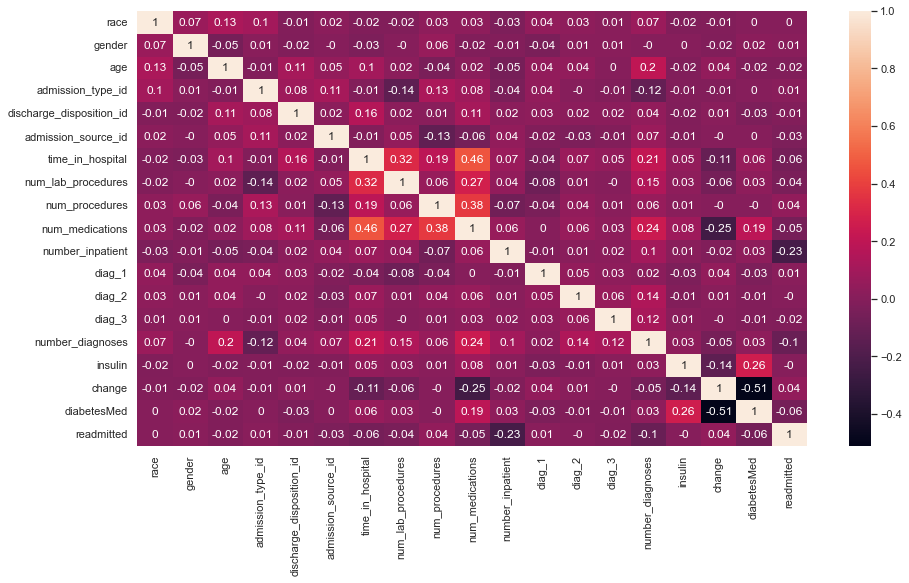

In [22]:
matrix = data.corr().round(2)
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(matrix, annot=True)

Nie są jakoś szczególnie skorelowane dane.

In [23]:
data.describe()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,insulin,change,diabetesMed,readmitted
count,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000
mean,1.658987,0.461174,6.126025,2.025803,3.753396,5.776741,4.422011,43.148462,1.350712,16.119590,0.646871,337.624240,274.955085,280.592114,7.512096,1.401042,0.538225,0.768470,1.420909
std,0.860854,0.498493,1.559081,1.450121,5.309412,4.071632,2.993070,19.711757,1.708475,8.108496,1.271025,159.449319,151.144566,175.386124,1.832472,0.839101,0.498539,0.421813,0.685176
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,5.000000,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,11.000000,0.000000,259.000000,140.000000,139.000000,6.000000,1.000000,0.000000,1.000000,1.000000
50%,2.000000,0.000000,6.000000,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,300.000000,258.000000,256.000000,8.000000,1.000000,1.000000,1.000000,2.000000
75%,2.000000,1.000000,7.000000,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,1.000000,435.000000,374.000000,370.000000,9.000000,2.000000,1.000000,1.000000,2.000000
max,4.000000,1.000000,9.000000,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,21.000000,712.000000,739.000000,785.000000,16.000000,3.000000,1.000000,1.000000,2.000000


C:\Users\Tomcio\AppData\Local\Temp\ipykernel_19104\764135200.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data[[e for e in data.columns if e not in temp.columns.tolist()]].hist(ax = ax)


array([[<AxesSubplot:title={'center':'admission_type_id'}>,
        <AxesSubplot:title={'center':'discharge_disposition_id'}>,
        <AxesSubplot:title={'center':'admission_source_id'}>],
       [<AxesSubplot:title={'center':'time_in_hospital'}>,
        <AxesSubplot:title={'center':'num_lab_procedures'}>,
        <AxesSubplot:title={'center':'num_procedures'}>],
       [<AxesSubplot:title={'center':'num_medications'}>,
        <AxesSubplot:title={'center':'number_inpatient'}>,
        <AxesSubplot:title={'center':'number_diagnoses'}>]], dtype=object)

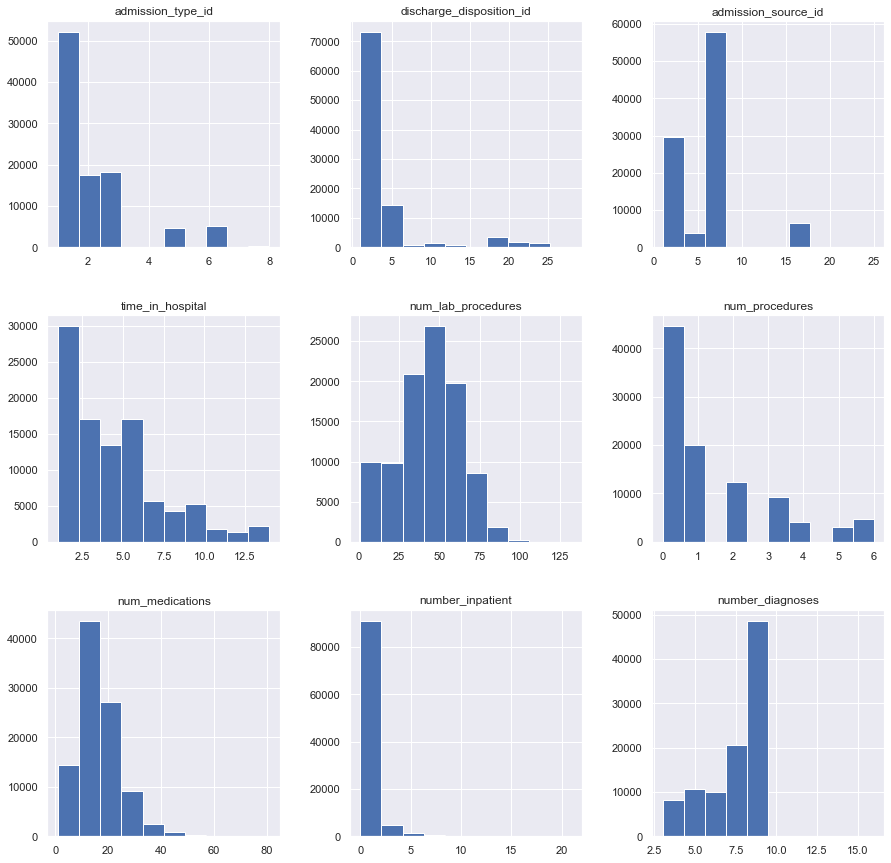

In [24]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
data[[e for e in data.columns if e not in temp.columns.tolist()]].hist(ax = ax)

In [25]:
data.number_inpatient.value_counts()

0     64633
1     19067
2      7421
3      3346
4      1597
5       802
6       474
7       266
8       147
9       111
10       60
11       48
12       33
13       20
14       10
15        8
16        5
19        2
21        1
18        1
Name: number_inpatient, dtype: int64

więc wszystkie zmienne numeryczne są git.

# Zmienna objaśniana/celu

Oczywiście jest to "readmitted".